# **Application of Machine Learning Techniques to Predict the Priceof Pre-owned Cars in Bangladesh**

**Author 1 :** 
Name : Hritu Raz Banik
Email : razhritu@gmail.com


**Author 2 :** 
Name : Golam Mohi Uddin Zilani
Email : gzilani764@gmail.com

In [24]:
# Assigning Dataset Path

dataset = 'car_dataset.csv'  ## Place your Dataset Path Here

# Importing / Installing packages

In [25]:
import math #mathematical computation
import pandas as pd #dataframe
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization
import matplotlib
import joblib #saving the model
import seaborn as sns #visualization
import json #exporting columns
import pickle #saving the model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.ensemble import RandomForestRegressor #Random Forest Regression
from xgboost import XGBRegressor # XGBoost Regression
from sklearn.model_selection import train_test_split #Splitting the dataset into training and testing
from sklearn.model_selection import ShuffleSplit #Random shuffling
from sklearn.model_selection import cross_val_score #Score cross validation
from sklearn.model_selection import cross_validate #Score cross validation
from sklearn.model_selection import GridSearchCV #Hyper parameter tuning
from statistics import stdev
from warnings import simplefilter #Filtering warnings

import warnings
warnings.filterwarnings('ignore')

In [26]:
df1 = pd.read_csv(dataset) # Here df is a data frame

In [27]:
df1.head()

,car_name,brand,car_model,model_year,transmission,body_type,fuel_type,engine_capacity,kilometers_run,price
0,Toyota Fielder 2011,Toyota,Fielder,2016,Automatic,Estate,CNG,1500,45852,1200000
1,Toyota Noah 2005,Toyota,Noah,2010,Automatic,Hatchback,CNG,1998,219630,1200000
2,Toyota LiteAce 2001,Toyota,LiteAce,2001,Manual,NaN,CNG,1800,102000,165000
3,Maruti Suzuki Vitara Brezza 1994,Maruti Suzuki,Vitara Brezza,1994,Manual,NaN,CNG,1600,113000,230000
4,Toyota Starlet good 1992,Toyota,Starlet,1992,Automatic,Saloon,CNG,1300,15000,330000


In [28]:
df1.shape

(1209, 10)

In [29]:
df1.columns


Index(['car_name', 'brand', 'car_model', 'model_year', 'transmission',
       'body_type', 'fuel_type', 'engine_capacity', 'kilometers_run', 'price'],
      dtype='object')

In [30]:
df1.nunique()

car_name           1108
brand                26
car_model           123
model_year           35
transmission          2
body_type             7
fuel_type            24
engine_capacity      51
kilometers_run      640
price               519
dtype: int64

# **Exploratory Data Analysis**

In [31]:
df2 = df1.drop(['car_name'],axis=1)
df2.head()

,brand,car_model,model_year,transmission,body_type,fuel_type,engine_capacity,kilometers_run,price
0,Toyota,Fielder,2016,Automatic,Estate,CNG,1500,45852,1200000
1,Toyota,Noah,2010,Automatic,Hatchback,CNG,1998,219630,1200000
2,Toyota,LiteAce,2001,Manual,NaN,CNG,1800,102000,165000
3,Maruti Suzuki,Vitara Brezza,1994,Manual,NaN,CNG,1600,113000,230000
4,Toyota,Starlet,1992,Automatic,Saloon,CNG,1300,15000,330000


**Check for null values**

In [32]:
# method 1
df2.isnull().any()

brand              False
car_model          False
model_year         False
transmission       False
body_type           True
fuel_type          False
engine_capacity    False
kilometers_run     False
price              False
dtype: bool

In [33]:
# method 2
df2.isnull().sum()

brand               0
car_model           0
model_year          0
transmission        0
body_type          18
fuel_type           0
engine_capacity     0
kilometers_run      0
price               0
dtype: int64

In [34]:
# Dropping 18 Nan Value Containing Rows
df2 = df2.dropna(how='any',axis=0) 
df2.isnull().sum()

brand              0
car_model          0
model_year         0
transmission       0
body_type          0
fuel_type          0
engine_capacity    0
kilometers_run     0
price              0
dtype: int64

In [104]:
# Previously 1209 rows. After dropping there are 1191 rows. So Dropping is not a problem here
df2.shape
df2.head(20)

,brand,car_model,model_year,transmission,body_type,fuel_type,engine_capacity,kilometers_run,price
0,Toyota,Fielder,2016,Automatic,Estate,CNG,1500,45852,1200000
1,Toyota,Noah,2010,Automatic,Hatchback,CNG,1998,219630,1200000
4,Toyota,Starlet,1992,Automatic,Saloon,CNG,1300,15000,330000
5,Toyota,Carina,1998,Automatic,Saloon,CNG,1500,60720,200000
6,Toyota,Corolla,2009,Automatic,Saloon,CNG,1500,70000,950000
7,Mitsubishi,Pajero,2000,Manual,SUV / 4x4,CNG,2350,750000,960000
8,Toyota,Axio,2016,Automatic,Saloon,"CNG, Hybrid",1500,96000,1830000
9,Toyota,Other Model,1996,Automatic,Estate,"CNG, Octane",1331,120000,350000
10,Toyota,Fielder,2001,Automatic,Estate,"CNG, Octane",1500,75000,799000
11,Toyota,Fielder,2001,Automatic,Estate,"CNG, Octane",1500,79250,785000


# **Check for data consistency**

In [36]:
df2.nunique()

brand               24
car_model          120
model_year          35
transmission         2
body_type            7
fuel_type           24
engine_capacity     50
kilometers_run     632
price              513
dtype: int64

In [105]:
df2.car_model.unique()

array(['Fielder', 'Noah', 'Starlet', 'Carina', 'Corolla', 'Pajero',
       'Axio', 'Other Model', 'Succeed', 'Probox', 'Spacio', 'Wish',
       'Raum', 'CR-V', 'Alto', 'ist', 'Rush', 'LiteAce', 'TownAce',
       'Hiace', 'Sienta', 'Avanza', 'Sprinter', 'Mark II', 'Corsa',
       'Corona', 'Allion', 'Premio', 'Lancer', 'Fit', 'Sunny', 'WagonR',
       'Prado', 'Carryboy', 'Kluger', 'RAV4', 'Hilux', 'H1', 'Indigo Ecs',
       'X-Trail', 'Land Cruiser', 'Harrier', 'Prius', 'Aqua', 'Esquire',
       'Grace', 'Axela', 'C-HR', 'Alphard', 'Vezel', 'Outlandar', 'Vitz',
       'Passo', 'RunX', 'Tiida', 'Swift', 'City', 'Civic', 'Bluebird',
       'Sonata', 'Accent', 'Auris', 'Yaris', 'Juke', 'Tucson'],
      dtype=object)

In [38]:
df2.transmission.unique()

array(['Automatic', 'Manual'], dtype=object)

In [39]:
df2.body_type.unique()

array(['Estate', 'Hatchback', 'Saloon', 'SUV / 4x4', 'MPV', 'Convertible',
       'Coupé/Sports'], dtype=object)

In [40]:
df2.fuel_type.unique()

array(['CNG', 'CNG, Hybrid', 'CNG, Octane', 'Diesel', 'Diesel, Petrol',
       'Hybrid', 'Hybrid, Octane', 'Hybrid, Octane, LPG', 'LPG', 'Octane',
       'Octane, LPG', 'Octane, Other fuel type', 'Petrol', 'Petrol, CNG',
       'Petrol, CNG, Octane', 'Petrol, CNG, Octane, LPG',
       'Petrol, Hybrid', 'Petrol, Hybrid, Octane',
       'Petrol, Hybrid, Octane, LPG', 'Petrol, LPG', 'Petrol, Octane',
       'Petrol, Octane, LPG', 'Petrol, Octane, Other fuel type',
       'Petrol, Other fuel type'], dtype=object)

In [41]:
df2.engine_capacity.unique()

array([1500, 1998, 1300, 2350, 1331, 1800, 1000, 2000,  150, 2500, 1781,
       1996, 1990, 2400, 1600, 1490, 1900, 1830, 1586, 1580, 1984, 1061,
       1496, 3300, 3500, 2260, 4200, 2200, 3000, 2700, 2389, 2779, 3700,
       4500, 1797, 2015,  660, 2367,  800, 1329, 1100, 1590, 1200, 1320,
       1400, 1499, 3400, 2972, 2362, 2490], dtype=int64)

# **Data Preprocessing : Fuel Type**

In [42]:
df2['car_model'].value_counts()

Premio       143
Axio         118
Allion       105
Noah          93
Corolla       90
            ... 
MR2            1
Crown          1
320i           1
Vista          1
CityRover      1
Name: car_model, Length: 120, dtype: int64

In [43]:
# removing values that only occurs once
df2 = df2[df2.groupby('car_model').car_model.transform('count') > 1]

In [44]:
df2['car_model'].value_counts()

Premio     143
Axio       118
Allion     105
Noah        93
Corolla     90
          ... 
Alto         2
Wish         2
WagonR       2
Avanza       2
Spacio       2
Name: car_model, Length: 65, dtype: int64

In [45]:
df2['body_type'].value_counts()

Saloon         606
MPV            193
SUV / 4x4      182
Estate          77
Hatchback       76
Convertible      2
Name: body_type, dtype: int64

In [46]:
df3 = df2[df2.groupby('body_type').body_type.transform('count') > 2]
df3['body_type'].value_counts()

Saloon       606
MPV          193
SUV / 4x4    182
Estate        77
Hatchback     76
Name: body_type, dtype: int64

In [47]:
df3['fuel_type'].value_counts()

CNG, Octane                        391
Octane                             246
Petrol, Octane                     116
Hybrid, Octane                      93
Petrol, Hybrid, Octane              62
Hybrid                              55
Petrol, CNG, Octane                 52
Petrol, CNG                         28
Diesel                              24
Octane, LPG                         22
Petrol                              21
CNG                                  6
Octane, Other fuel type              4
Petrol, Octane, LPG                  3
Petrol, Other fuel type              2
CNG, Hybrid                          1
LPG                                  1
Petrol, CNG, Octane, LPG             1
Petrol, Hybrid                       1
Hybrid, Octane, LPG                  1
Petrol, Hybrid, Octane, LPG          1
Petrol, LPG                          1
Diesel, Petrol                       1
Petrol, Octane, Other fuel type      1
Name: fuel_type, dtype: int64

In [48]:
df4 = df3[df3.groupby('fuel_type').fuel_type.transform('count') > 2]
df4['fuel_type'].value_counts()

CNG, Octane                391
Octane                     246
Petrol, Octane             116
Hybrid, Octane              93
Petrol, Hybrid, Octane      62
Hybrid                      55
Petrol, CNG, Octane         52
Petrol, CNG                 28
Diesel                      24
Octane, LPG                 22
Petrol                      21
CNG                          6
Octane, Other fuel type      4
Petrol, Octane, LPG          3
Name: fuel_type, dtype: int64

In [49]:
# Replacing Values by following Condtions
df4.loc[df4['fuel_type'] == 'CNG, Octane', 'fuel_type'] = 'CNG and OIL'
df4.loc[df4['fuel_type'] == 'CNG', 'fuel_type'] = 'CNG and OIL'
df4.loc[df4['fuel_type'] == 'Octane', 'fuel_type'] = 'OIL'
df4.loc[df4['fuel_type'] == 'Petrol, Octane', 'fuel_type'] = 'OIL'
df4.loc[df4['fuel_type'] == 'Hybrid, Octane', 'fuel_type'] = 'HYBRID'
df4.loc[df4['fuel_type'] == 'Petrol, Hybrid, Octane', 'fuel_type'] = 'HYBRID'
df4.loc[df4['fuel_type'] == 'Hybrid', 'fuel_type'] = 'HYBRID'
df4.loc[df4['fuel_type'] == 'Petrol, CNG, Octane', 'fuel_type'] = 'CNG and OIL'
df4.loc[df4['fuel_type'] == 'Diesel', 'fuel_type'] = 'OIL'
df4.loc[df4['fuel_type'] == 'Petrol, CNG', 'fuel_type'] = 'CNG and OIL'
df4.loc[df4['fuel_type'] == 'Petrol', 'fuel_type'] = 'OIL'
df4.loc[df4['fuel_type'] == 'Octane, LPG', 'fuel_type'] = 'LPG and OIL'
df4.loc[df4['fuel_type'] == 'Petrol, Octane, LPG', 'fuel_type'] = 'LPG and OIL'
df4.loc[df4['fuel_type'] == 'Octane, Other fuel type', 'fuel_type'] = 'OIL'

df4['fuel_type'].value_counts()

CNG and OIL    477
OIL            411
HYBRID         210
LPG and OIL     25
Name: fuel_type, dtype: int64

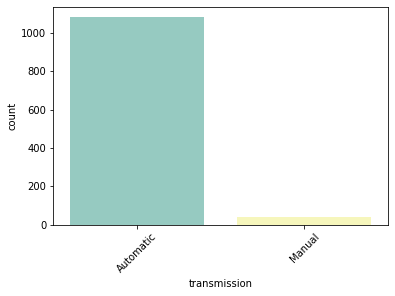

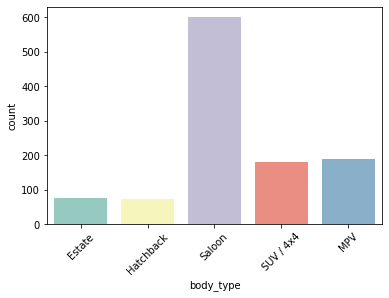

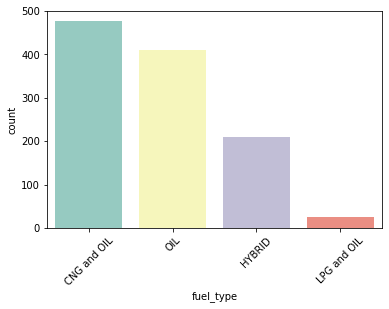

In [50]:
 #Looping through all the features by our y variable - see if there is relationship

features = [ 'transmission','body_type', 'fuel_type']

for f in features:
    sns.countplot(x = f, data = df4, palette = 'Set3')
    plt.xticks(rotation=45)
    plt.show()

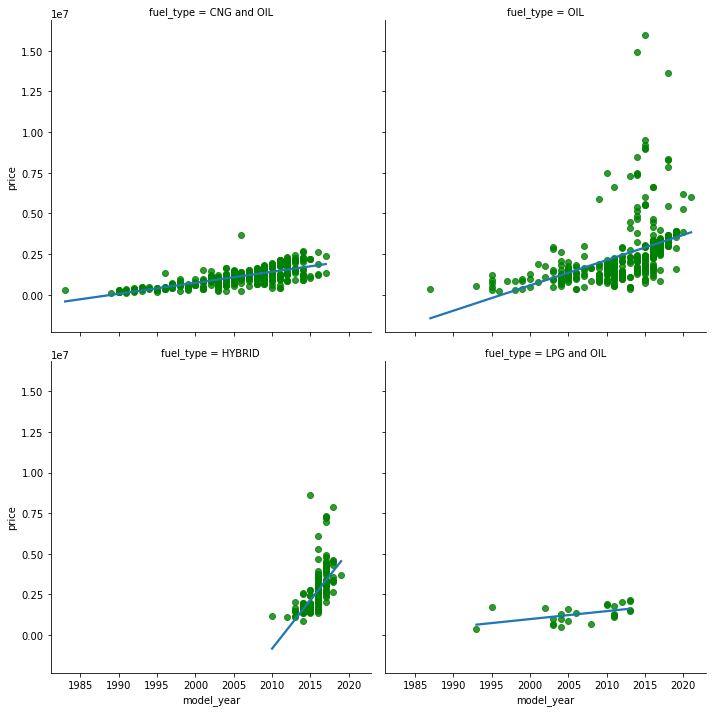

In [51]:
# Visualising a Subset of our data - important featuresz
g = sns.lmplot(x = 'model_year', y = 'price', data = df4, col = 'fuel_type', col_wrap = 2, height = 5, 
              scatter_kws = {'color':'green'}, ci = False)

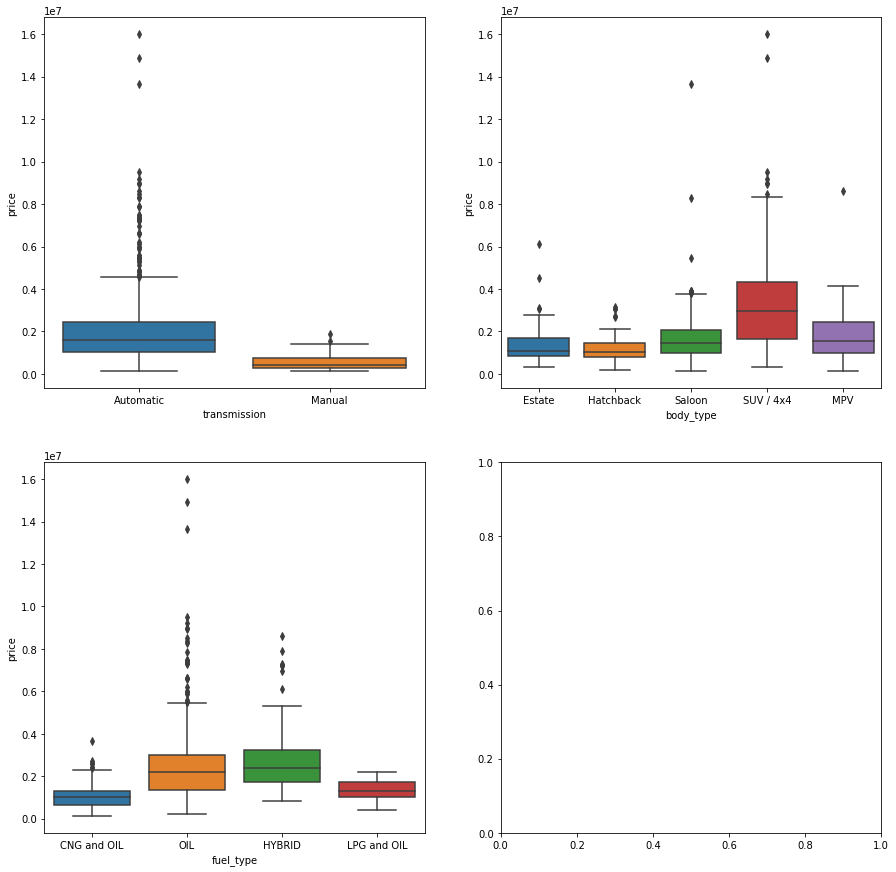

In [52]:
categorical = [ 'transmission','body_type', 'fuel_type']
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x = var, y='price', data = df4, ax = subplot)

Here we can see that for transmission type, Automatic Cars have highers average selling price than the manual transmission cars. And moreover for fule type, Hybrid cars have the higher average selling price because they are latest model cars and almost new.So the selling price is High. And convertible body type cars also have higher average selling price


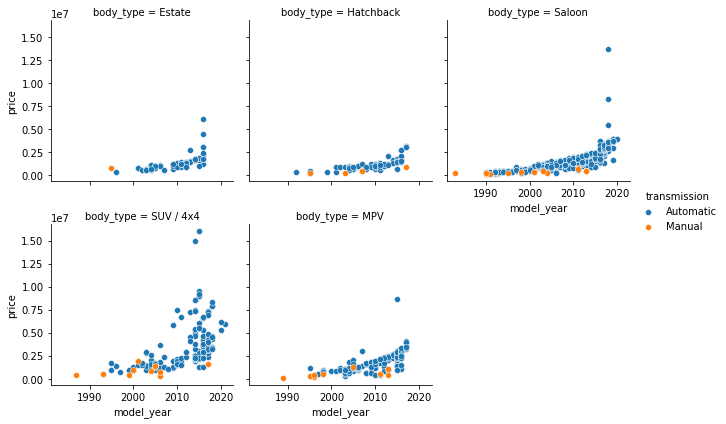

In [53]:
cond_plot = sns.FacetGrid(data=df4, col='body_type', hue = 'transmission', col_wrap=3)
cond_plot.map(sns.scatterplot, 'model_year', 'price');
cond_plot.add_legend()

For each individual body_type we can see the relationship between model_year and selling price.
And another categorical variable transmission to the (optional) hue parameter — the orange points correspond to cars that is manual. As we can see, these cars tend to sell at a lower price. And also there are some outliers in saloon type cars and SUV/4*4 type cars

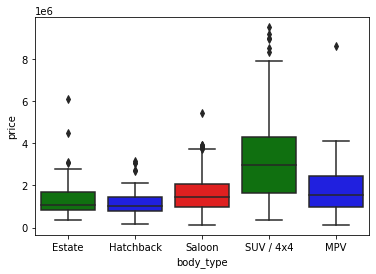

In [97]:
# Investigate the distribution of price by Categorical Variables

pal = ['green', 'blue', 'red']
g = sns.boxplot(x = 'body_type', y = 'price', data = df4, palette = pal)

# You can pick colors from https://htmlcolorcodes.com/color-picker/

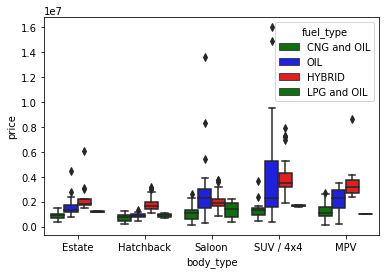

In [55]:
g = sns.boxplot(x = 'body_type', y = 'price', hue = 'fuel_type', data = df4, palette = pal)

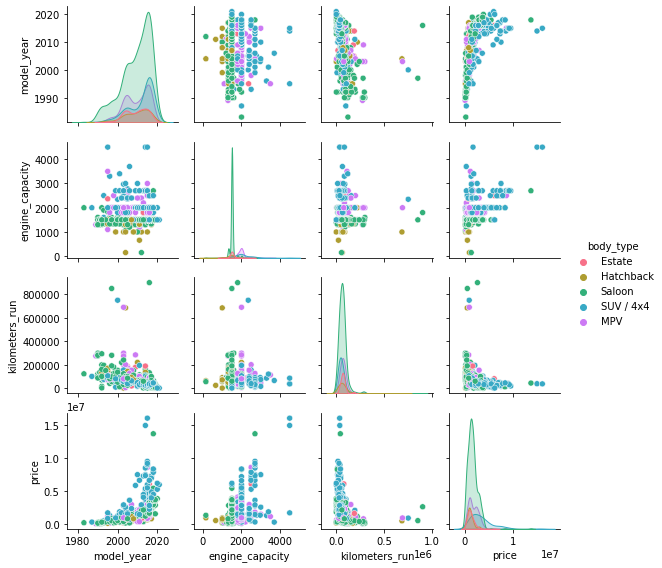

In [56]:
# By Body Type
sns.pairplot(df4,hue = 'body_type',diag_kind = "kde",kind = "scatter",palette = "husl",height= 2)
plt.show()

We can see that the saloon body type cars have higher price range and also they have higher kilometers run. And SUV/4*4 body type cars have wide price range.We can clearly see that there are some outliers in price and kilometers_run

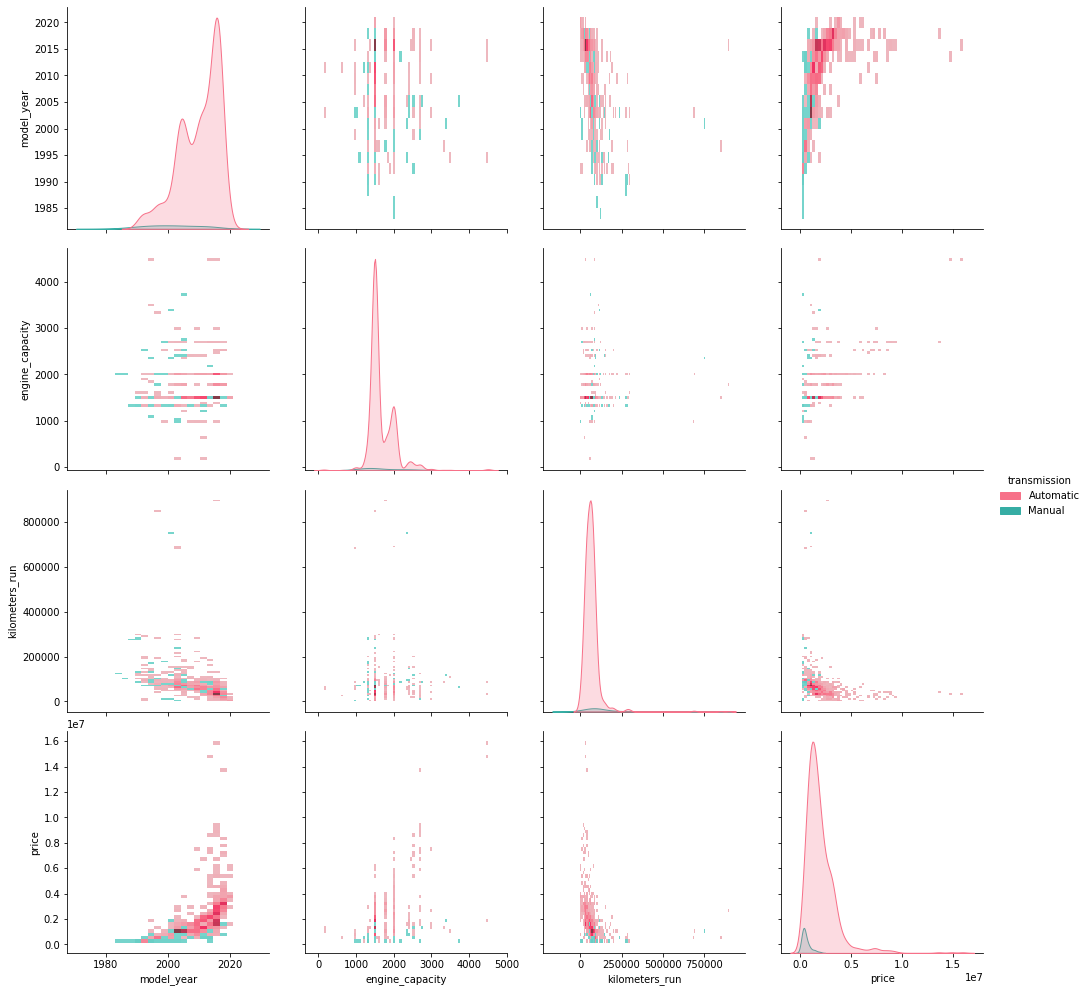

In [57]:
# By Transmission
sns.pairplot(df4,hue = 'transmission',diag_kind = "kde",kind = "hist",palette = "husl",height=3.5)
plt.show()

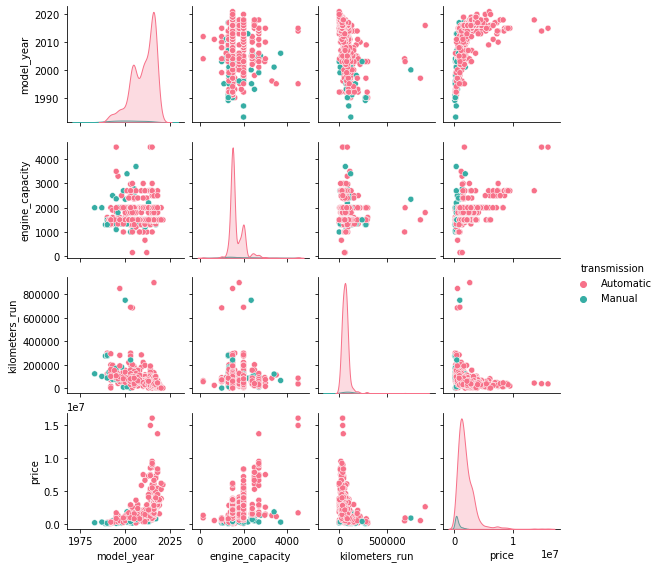

In [58]:
# By Transmission
sns.pairplot(df4,hue = 'transmission',diag_kind = "kde",kind = "scatter",palette = "husl",height=2)
plt.show()


We can see that automatic cars have higher price range than manual type cars though the distribution of automatic cars were skewed to the right. We can also see the increase of automatic cars between 2015 and 2020. In this instance, we can clearly see some outliers in price and kilometers_run.

In [59]:
manual = df4[df4['transmission'] == 'Manual']
automatic = df4[df4['transmission'] == 'Automatic']
hue_order_fuel_type = ['CNG and OIL', 'OIL', 'HYBRID', 'LPG and OIL']

Manual type car


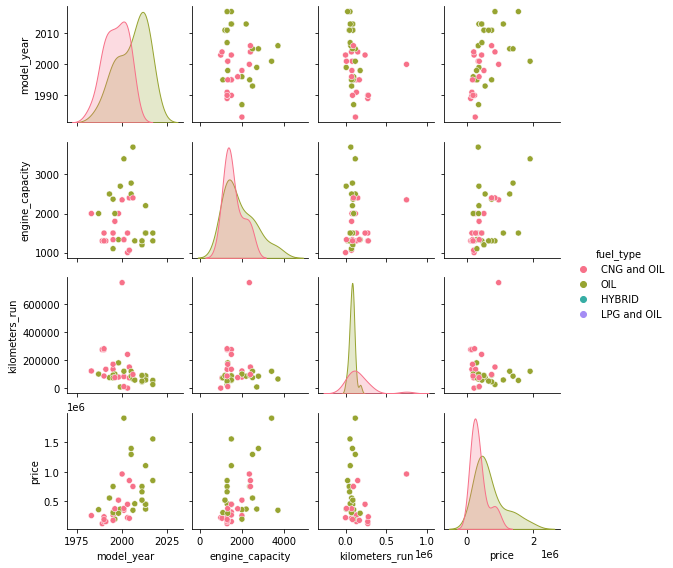

In [60]:
print('Manual type car')
sns.pairplot(manual,hue ='fuel_type', hue_order = hue_order_fuel_type ,diag_kind = "kde",kind = "scatter",palette = "husl",height=2)
plt.show()

Automatic type car


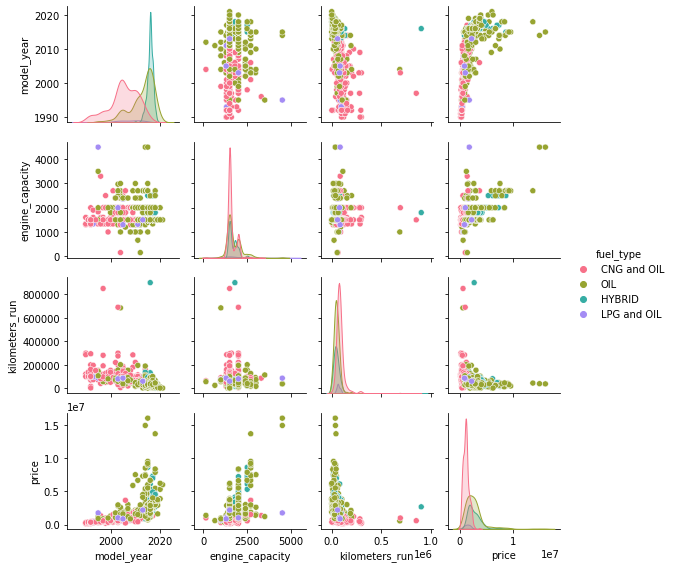

In [61]:
print('Automatic type car')
sns.pairplot(automatic , hue = 'fuel_type', hue_order = hue_order_fuel_type , diag_kind = "kde" , kind = "scatter" , palette = "husl" , height=2)
plt.show()

We can see that the selling price of OIL type cars in both manual and automatic were more spread than 'CNG and Oil', 'OIL', 'HYBRID', 'LPG and OIL' hence getting higher average and range of selling price


# Data Preprocessing : Year and Kilometers_run

In [62]:
df4.head()

,brand,car_model,model_year,transmission,body_type,fuel_type,engine_capacity,kilometers_run,price
0,Toyota,Fielder,2016,Automatic,Estate,CNG and OIL,1500,45852,1200000
1,Toyota,Noah,2010,Automatic,Hatchback,CNG and OIL,1998,219630,1200000
4,Toyota,Starlet,1992,Automatic,Saloon,CNG and OIL,1300,15000,330000
5,Toyota,Carina,1998,Automatic,Saloon,CNG and OIL,1500,60720,200000
6,Toyota,Corolla,2009,Automatic,Saloon,CNG and OIL,1500,70000,950000


In [63]:
km_mean = df4.groupby('model_year')['kilometers_run'].mean()

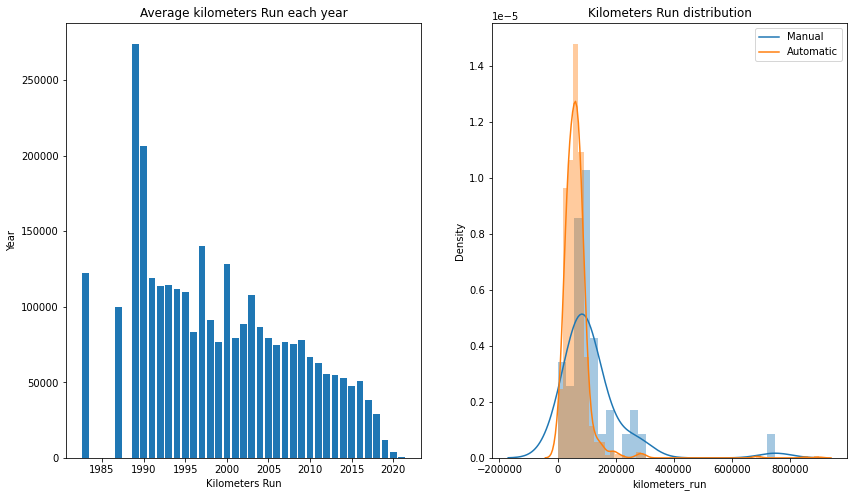

In [64]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(14,8))

ax[0].bar(km_mean.index,km_mean)
sns.distplot(manual['kilometers_run'],ax=ax[1])
sns.distplot(automatic['kilometers_run'],ax=ax[1])

ax[0].set_title('Average kilometers Run each year')
ax[0].set_xlabel('Kilometers Run')
ax[0].set_ylabel('Year')

ax[1].set_title('Kilometers Run distribution')
ax[1].legend(['Manual','Automatic'])

plt.show()

We can see that average kilometers driven almost linearly goes down from 1992. We can also see some outliers present in the distribution plot.

# Data Preprocessing : Model Year and Selling Price

In [65]:
year_mean_manual = df4[df4['transmission']=='Manual'].groupby('model_year')['price'].mean()
year_mean_automatic = df4[df4['transmission']=='Automatic'].groupby('model_year')['price'].mean()

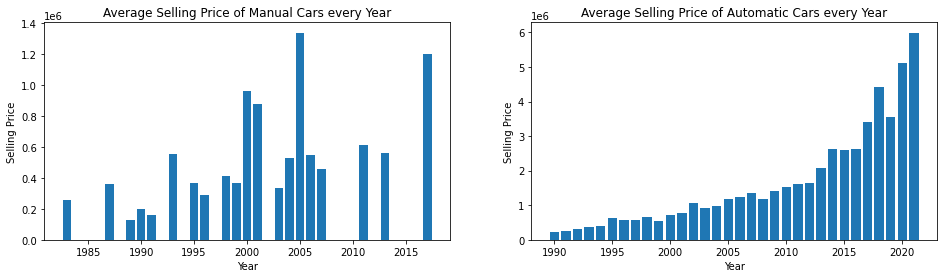

In [66]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

ax[0].bar(year_mean_manual.index,year_mean_manual)
ax[1].bar(year_mean_automatic.index,year_mean_automatic)

ax[0].set_title('Average Selling Price of Manual Cars every Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Selling Price')

ax[1].set_title('Average Selling Price of Automatic Cars every Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Selling Price')

plt.show()

We can see that selling price of Automatic cars grows linearly each year whereas manual cars have wavy averages in each year but we can clearly see that selling price grows linearly as well.

# Data Preprocessing : Data Cleaning || Removing Outliers

In [67]:
df4 = df4.drop(df4[(df4['price'] > 7500000) & (df4['body_type'] == 'Saloon')].index)
df4 = df4.drop(df4[(df4['price'] > 12500000) & (df4['body_type'] == 'SUV / 4x4')].index)

In [68]:
df4.groupby('transmission').agg(['mean','std','min','max']).applymap(lambda x: format(x,'.0f')).drop(['model_year'],axis=1)

engine_capacity                  kilometers_run               \
                        mean  std   min   max           mean     std  min   
transmission                                                                
Automatic               1657  328   150  4500          65430   56651    6   
Manual                  1759  636  1000  3700         117819  119803  200   

                        price                            
                 max     mean      std     min      max  
transmission                                             
Automatic     900000  1908039  1343640  135000  9500000  
Manual        750000   545026   403285  125000  1900000

Clearly we have some outliers present in kilometers driven and selling price. We need to remove these outliers by using IQR method.

In [69]:
def remove_outlier_km_driven(df):
    temp = pd.DataFrame()
    
    df_km_driven = df['kilometers_run']
    Q1 = df_km_driven.quantile(0.25)
    Q3 = df_km_driven.quantile(0.75)
    IQR = Q3 - Q1
    df_outlier = df_km_driven[(df_km_driven < (Q1 - 1.5 * IQR)) | (df_km_driven > (Q3 + 1.5 * IQR))]
    temp = pd.concat([temp,df_outlier])
        
    return df.drop(temp.index)

df5 = remove_outlier_km_driven(df4)


Removing outliers in selling price would be separated by transmission type and will be done in each year.

In [70]:
def remove_outlier_selling_price(df):
    temp = pd.DataFrame()
    for year in sorted(df.model_year.unique()):
        year_price_manual = df[(df['model_year']==year) & (df['transmission']=='Manual')]['price']
        manual_Q1 = year_price_manual.quantile(0.25)
        manual_Q3 = year_price_manual.quantile(0.75)
        manual_IQR = manual_Q3 - manual_Q1
        outlier_manual = year_price_manual[(year_price_manual < (manual_Q1 - 1.5 * manual_IQR)) | (year_price_manual > (manual_Q3 + 1.5 * manual_IQR))]
        temp = pd.concat([temp,outlier_manual])
        
        year_price_automatic = df[(df['model_year']==year) & (df['transmission']=='Automatic')]['price']
        automatic_Q1 = year_price_automatic.quantile(0.25)
        automatic_Q3 = year_price_automatic.quantile(0.75)
        automatic_IQR = automatic_Q3 - automatic_Q1
        outlier_automatic = year_price_automatic[(year_price_automatic < (automatic_Q1 - 1.5 * automatic_IQR)) | (year_price_automatic > (automatic_Q3 + 1.5 * automatic_IQR))]
        temp = pd.concat([temp,outlier_automatic])
    return df.drop(temp.index)

df6 = remove_outlier_selling_price(df5)

In [71]:
year_mean_manual = df6[df6['transmission']=='Manual'].groupby('model_year')['price'].mean()
year_mean_automatic = df6[df6['transmission']=='Automatic'].groupby('model_year')['price'].mean()

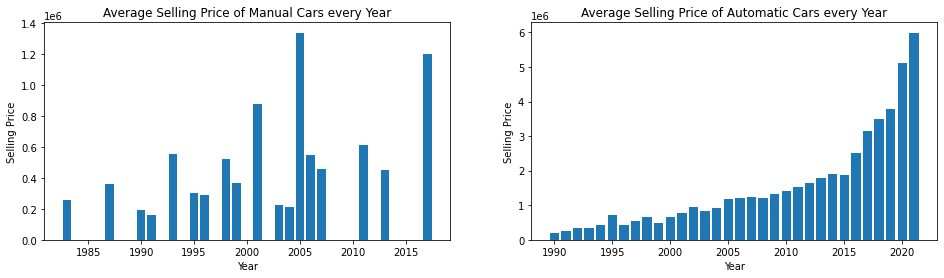

In [72]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

ax[0].bar(year_mean_manual.index,year_mean_manual)
ax[1].bar(year_mean_automatic.index,year_mean_automatic)

ax[0].set_title('Average Selling Price of Manual Cars every Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Selling Price')

ax[1].set_title('Average Selling Price of Automatic Cars every Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Selling Price')

plt.show()

In [73]:
# we can also safely remove the datapoints before 1990 since it produces inconsistency and the data points

df7 = df6[df6['model_year']>1990]

In [74]:
year_mean_manual_price = df7[df7['transmission']=='Manual'].groupby('model_year')['price'].mean()
year_mean_automatic_price = df7[df7['transmission']=='Automatic'].groupby('model_year')['price'].mean()
year_mean_manual_km = df7[df7['transmission']=='Manual'].groupby('model_year')['kilometers_run'].mean()
year_mean_automatic_km = df7[df7['transmission']=='Automatic'].groupby('model_year')['kilometers_run'].mean()

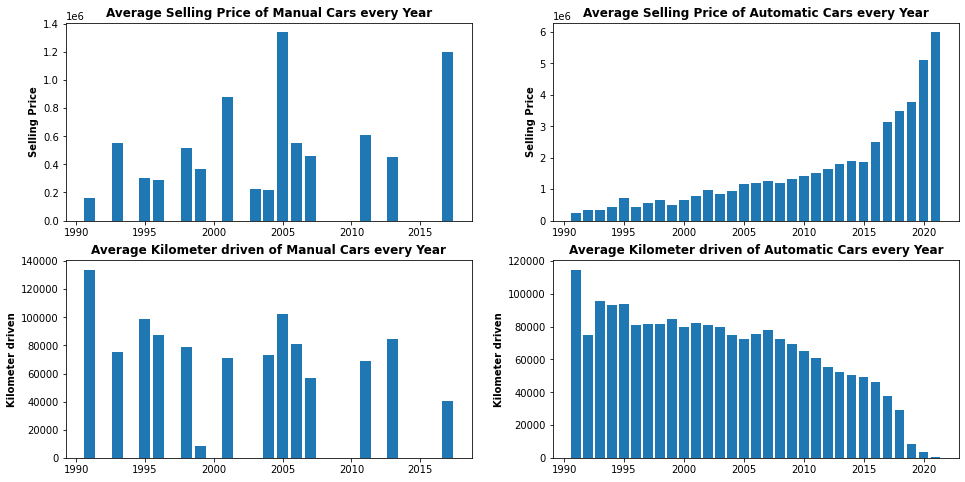

In [75]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(16,8))

ax[0][0].bar(year_mean_manual_price.index,year_mean_manual_price)
ax[0][1].bar(year_mean_automatic_price.index,year_mean_automatic_price)

ax[1][0].bar(year_mean_manual_km.index,year_mean_manual_km)
ax[1][1].bar(year_mean_automatic_km.index,year_mean_automatic_km)

ax[0][0].set_title('Average Selling Price of Manual Cars every Year' ,fontweight='bold')
ax[0][0].set_ylabel('Selling Price' ,fontweight='bold')

ax[0][1].set_title('Average Selling Price of Automatic Cars every Year' ,fontweight='bold')
ax[0][1].set_ylabel('Selling Price' ,fontweight='bold')

ax[1][0].set_title('Average Kilometer driven of Manual Cars every Year' ,fontweight='bold')
ax[1][0].set_ylabel('Kilometer driven' ,fontweight='bold')

ax[1][1].set_title('Average Kilometer driven of Automatic Cars every Year' ,fontweight='bold')
ax[1][1].set_ylabel('Kilometer driven' ,fontweight='bold')

plt.show()

Now we successfully removed outliers.
Now lets see our data in 3d.

In [76]:
manual = df7[df7['transmission']=='Manual']
automatic = df7[df7['transmission']=='Automatic']

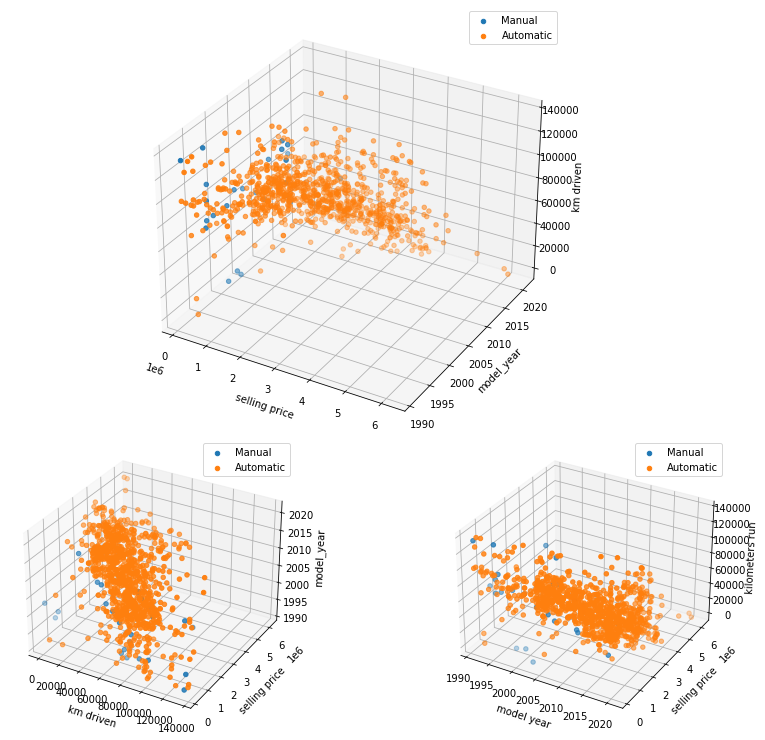

In [77]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.add_axes([0.2,0,1.5,1.5], projection='3d')

ax.scatter(manual['price'],manual['model_year'],manual['kilometers_run'])
ax.scatter(automatic['price'],automatic['model_year'],automatic['kilometers_run'])

ax.set_xlabel('selling price')
ax.set_ylabel('model_year')
ax.set_zlabel('km driven')

ax.legend(['Manual','Automatic'])

ax=fig.add_axes([0,-1,1,1], projection='3d')

ax.scatter(manual['kilometers_run'],manual['price'],manual['model_year'])
ax.scatter(automatic['kilometers_run'],automatic['price'],automatic['model_year'])

ax.set_xlabel('km driven')
ax.set_ylabel('selling price')
ax.set_zlabel('model_year')

ax.legend(['Manual','Automatic'])

ax=fig.add_axes([1,-1,1,1], projection='3d')

ax.scatter(manual['model_year'],manual['price'],manual['kilometers_run'])
ax.scatter(automatic['model_year'],automatic['price'],automatic['kilometers_run'])

ax.set_xlabel('model year')
ax.set_ylabel('selling price')
ax.set_zlabel('kilometers run')

ax.legend(['Manual','Automatic'])

plt.show()

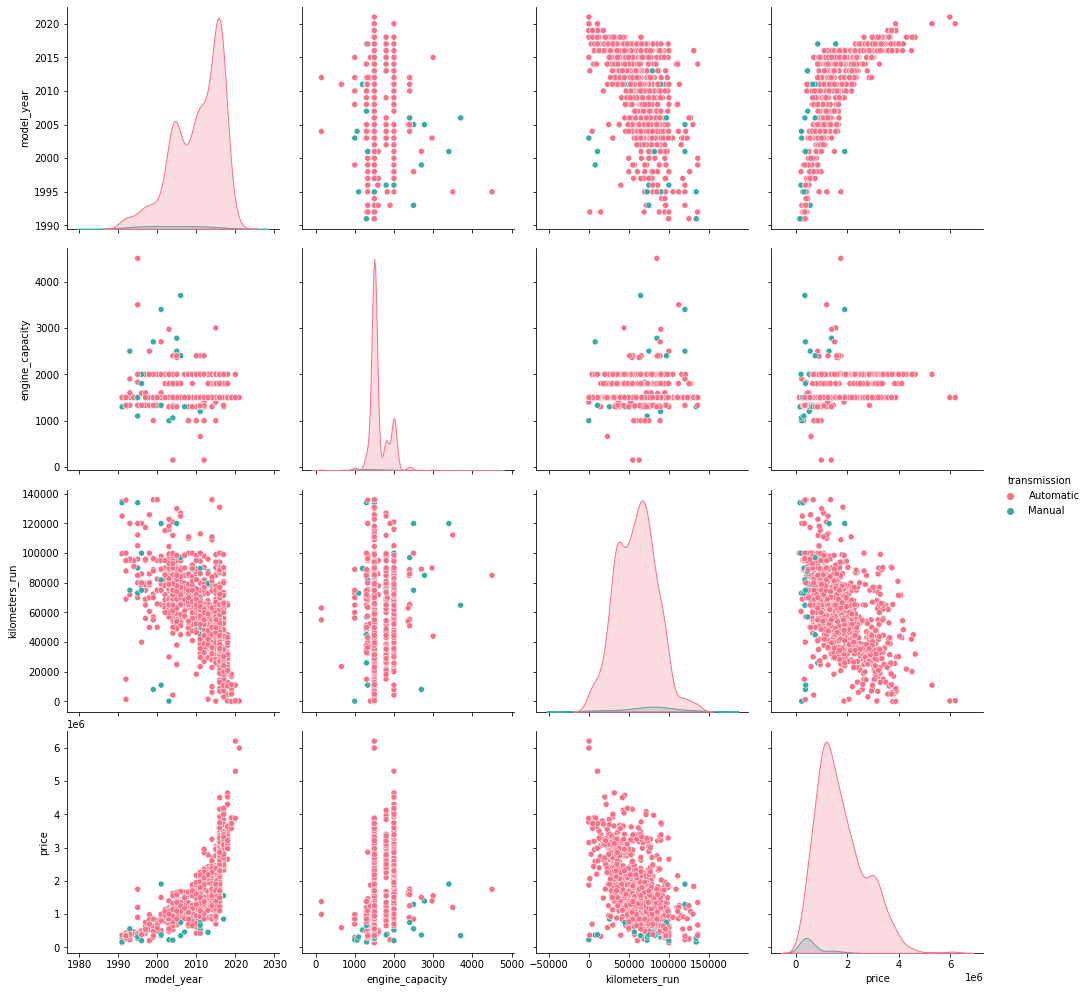

In [78]:
sns.pairplot(df7,hue='transmission',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

kilometers run decreases whereas selling price increases over the years. We can also see that automatic cars have higher prices than manual cars. Now it's time to build our model.

In [79]:
df7.head()

,brand,car_model,model_year,transmission,body_type,fuel_type,engine_capacity,kilometers_run,price
0,Toyota,Fielder,2016,Automatic,Estate,CNG and OIL,1500,45852,1200000
4,Toyota,Starlet,1992,Automatic,Saloon,CNG and OIL,1300,15000,330000
5,Toyota,Carina,1998,Automatic,Saloon,CNG and OIL,1500,60720,200000
6,Toyota,Corolla,2009,Automatic,Saloon,CNG and OIL,1500,70000,950000
9,Toyota,Other Model,1996,Automatic,Estate,CNG and OIL,1331,120000,350000


In [80]:
categorical_columns = ['brand','body_type','car_model']
le = LabelEncoder()

for feat in categorical_columns:
    df7[feat] = le.fit_transform(df7[feat].astype(str))



transmission = pd.get_dummies(df7['transmission'])
fuel = pd.get_dummies(df7['fuel_type'])

X = pd.concat([transmission,fuel,df7.drop(['transmission','fuel_type','price'],axis=1)],axis=1)
y = df7['price']

In [81]:
X.tail(20)

,Automatic,Manual,CNG and OIL,HYBRID,LPG and OIL,OIL,brand,car_model,model_year,body_type,engine_capacity,kilometers_run
1166,1,0,0,0,0,1,10,37,2018,4,1500,10370
1167,1,0,0,0,0,1,10,1,2019,4,1500,5000
1168,1,0,0,0,0,1,10,37,2019,4,1500,11295
1169,1,0,0,0,0,1,10,37,2019,4,1500,5000
1170,1,0,0,0,0,1,10,24,1995,3,2000,105000
1174,1,0,0,0,0,1,10,40,2004,3,1800,65000
1176,1,0,0,0,0,1,10,40,2005,3,2400,86000
1178,1,0,0,0,0,1,1,54,2010,3,2000,46569
1181,1,0,0,0,0,1,1,54,2011,3,2000,29698
1182,1,0,0,0,0,1,0,10,2012,3,2000,44428


# **Correlation of Features**

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(792, 12)
(199, 12)
(792,)
(199,)


In [83]:
# Let's find the feature correlations

corr = X_train.corr()
corr

# Note that the correlation values lie between -1 and +1
# A correlation value close to -1 indicates a strong negative linear correlation
# A correlation value close to +1 indicates a strong positive linear correlation
# A correlation value close to 0 indicates no linear correlation

,Automatic,Manual,CNG and OIL,HYBRID,LPG and OIL,OIL,brand,car_model,model_year,body_type,engine_capacity,kilometers_run
Automatic,1.000000,-1.000000,0.015287,0.079446,0.027237,-0.089631,0.057748,-0.057819,0.186069,-0.002223,-0.095918,-0.107507
Manual,-1.000000,1.000000,-0.015287,-0.079446,-0.027237,0.089631,-0.057748,0.057819,-0.186069,0.002223,0.095918,0.107507
CNG and OIL,0.015287,-0.015287,1.000000,-0.415354,-0.142401,-0.645146,0.266869,-0.086395,-0.615949,0.001504,-0.092978,0.489120
HYBRID,0.079446,-0.079446,-0.415354,1.000000,-0.079446,-0.359927,-0.202612,-0.082850,0.426782,-0.091753,0.033453,-0.235641
LPG and OIL,0.027237,-0.027237,-0.142401,-0.079446,1.000000,-0.123398,0.036615,0.034598,-0.066205,0.014447,-0.053727,0.036977
OIL,-0.089631,0.089631,-0.645146,-0.359927,-0.123398,1.000000,-0.122385,0.145026,0.309635,0.068379,0.086628,-0.324804
brand,0.057748,-0.057748,0.266869,-0.202612,0.036615,-0.122385,1.000000,-0.181018,-0.128610,-0.098629,-0.021746,0.191911
car_model,-0.057819,0.057819,-0.086395,-0.082850,0.034598,0.145026,-0.181018,1.000000,-0.018353,-0.234591,0.142904,-0.008826
model_year,0.186069,-0.186069,-0.615949,0.426782,-0.066205,0.309635,-0.128610,-0.018353,1.000000,0.011833,0.004117,-0.630916
body_type,-0.002223,0.002223,0.001504,-0.091753,0.014447,0.068379,-0.098629,-0.234591,0.011833,1.000000,-0.192591,-0.085415


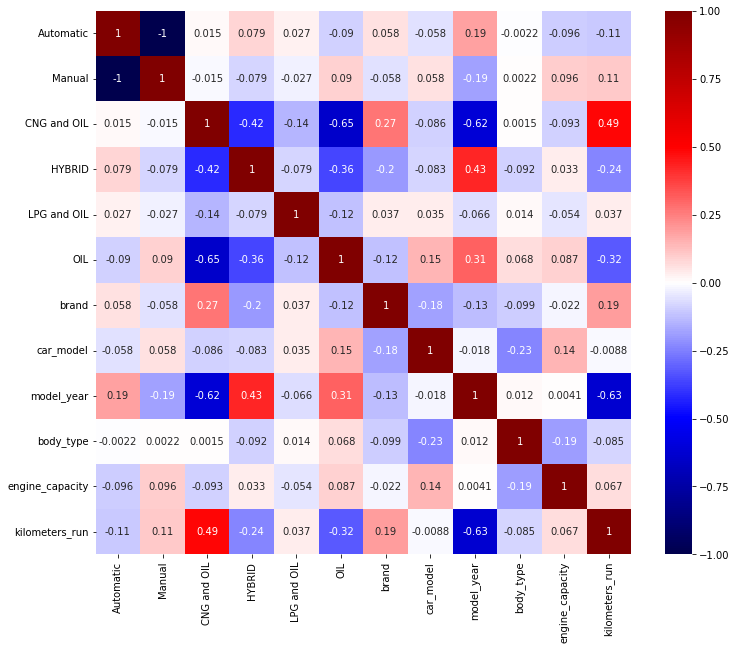

In [99]:
# A good way to visualize correlation is using a heatmap
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic");
# A link to choose different cmaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

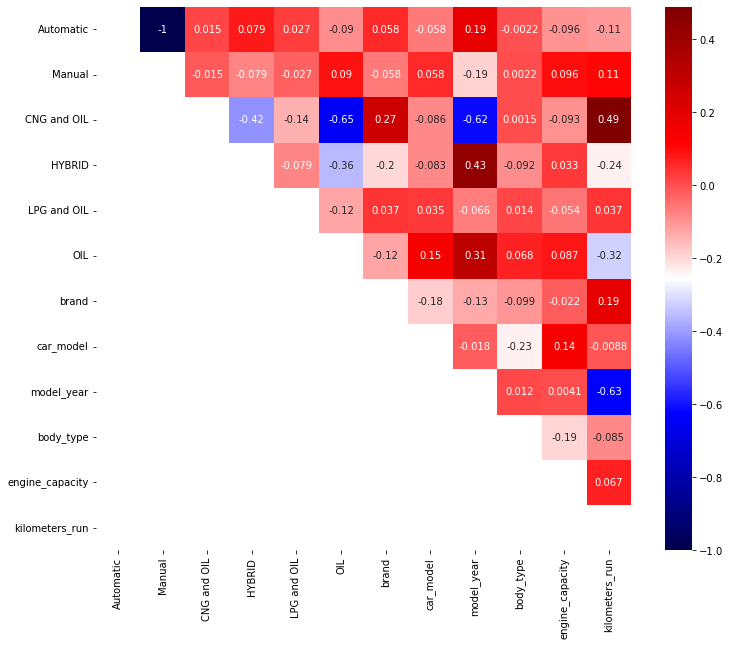

In [85]:
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask2);

In [86]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [87]:
corr_features = correlation(X_train, 0.90) # 85% is a good value of the threshold
print(len(corr_features))
print(corr_features)

1
{'Manual'}


**Manual Transmission is the highy Correlated Feature**

In [88]:
# Now dropping the Manual Transmission Column as it is highly correlated with Automatic Column
X = X.drop(columns = 'Manual')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [89]:
X.head(5)

,Automatic,CNG and OIL,HYBRID,LPG and OIL,OIL,brand,car_model,model_year,body_type,engine_capacity,kilometers_run
0,1,1,0,0,0,10,19,2016,0,1500,45852
4,1,1,0,0,0,10,48,1992,4,1300,15000
5,1,1,0,0,0,10,11,1998,4,1500,60720
6,1,1,0,0,0,10,15,2009,4,1500,70000
9,1,1,0,0,0,10,33,1996,0,1331,120000


# **Applying Linear Regression**

**Applying Min Max Scaler**

In [90]:
scale_vars = ['Automatic', 'CNG and OIL', 'HYBRID', 'LPG and OIL', 'OIL','body_type','engine_capacity',
                'kilometers_run']
scaler = MinMaxScaler()
X_train[scale_vars] = scaler.fit_transform(X_train[scale_vars])
X_test[scale_vars] = scaler.transform(X_test[scale_vars])

In [91]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.7356313180950251


Use K Fold cross validation to measure accuracy of our LinearRegression model.

In [92]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.67562281, 0.75821398, 0.69471014, 0.69207761, 0.6535841 ])

As we are getting low score from Linear Regression. Now we are going to find out if we can get better results from different regression models.

# **Finding Out best Models and parameters also**

In [100]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse','mae'],
                'n_estimators': range(30,100,5)
            }
        },
        'XGBoost': {
            'model': XGBRegressor(objective ='reg:squarederror'),
            'params': {
                'criterion' : ['mse','friedman_mse','mae'],
                #'objective' : 'reg:squarederror',
                'n_estimators': range(30,100,5),
                'max_depth': range(1,6,1),
                'eta' : [0.1,0.01],
                'colsample_bytree' : np.linspace(0,1,10,endpoint=False)
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

a = find_best_model_using_gridsearchcv(X,y)
a.head()

KeyboardInterrupt: 

In [ ]:
linear_regression_params = a['best_params'][0]
lasso_best_params = a['best_params'][1]
decision_tree_best_params = a['best_params'][2]
random_forest_best_params = a['best_params'][3]
xg_boost_best_params = a['best_params'][4]
print(linear_regression_params)
print(random_forest_best_params)
print(xg_boost_best_params)

{'normalize': False}
{'alpha': 1, 'selection': 'random'}
{'criterion': 'friedman_mse', 'max_depth': 9, 'splitter': 'best'}
{'criterion': 'friedman_mse', 'n_estimators': 55}
{'colsample_bytree': 0.8, 'criterion': 'mse', 'eta': 0.1, 'max_depth': 5, 'n_estimators': 95}


In [ ]:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

# Scoring Parameters
scoring = ['r2','neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_median_absolute_error']
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)



# Linear Regression
linear_regression_score = cross_validate(LinearRegression(normalize =  linear_regression_params['normalize']), X, y, scoring=scoring, cv=cv)


# Random Forest
random_forest_score = cross_validate(RandomForestRegressor(n_estimators = random_forest_best_params['n_estimators'] , criterion = random_forest_best_params['criterion']), X, y, scoring=scoring, cv=cv)

# XGBoost
xgboost_score = cross_validate( XGBRegressor(objective ='reg:squarederror',colsample_bytree = xg_boost_best_params['colsample_bytree'], eta = xg_boost_best_params['eta'], max_depth = xg_boost_best_params['max_depth'], n_estimators = xg_boost_best_params['n_estimators']) , X, y, scoring=scoring, cv=cv)


In [ ]:
def print_score(regressor_type, score):
    print('Regressor Type : '+regressor_type)
    print('The Standard deviation  on the Testing dataset is:    ', stdev(score['test_r2']))
    print('The Mean R2 Score  on the Testing dataset is:    ', score['test_r2'].mean())
    print('The Mean Log of Mean Squared Error on the Testing dataset is: ', math.log(-1 * score['test_neg_mean_squared_error'].mean()))
    print('The Mean Log of Root Mean Squared Error on the Testing dataset is: ', math.log(-1 * score['test_neg_root_mean_squared_error'].mean()))
    print('The Mean Log of Mean Absolute Error on the Testing dataset is:  ', math.log(-1 * score['test_neg_median_absolute_error'].mean()))
    print('\n\n')

print_score('Linear Regression', linear_regression_score)
print_score('Random Forest', random_forest_score)
print_score('XGBoost', xgboost_score)

Regressor Type : Linear Regression
The Standard deviation  on the Testing dataset is:     0.03751033494631008
The Mean R2 Score  on the Testing dataset is:     0.705511282316101
The Mean Log of Mean Squared Error on the Testing dataset is:  26.296129186961586
The Mean Log of Root Mean Squared Error on the Testing dataset is:  13.147156304582321
The Mean Log of Mean Absolute Error on the Testing dataset is:   12.553043599607822



Regressor Type : Lasso Regression
The Standard deviation  on the Testing dataset is:     0.037509695973384174
The Mean R2 Score  on the Testing dataset is:     0.7055115143152964
The Mean Log of Mean Squared Error on the Testing dataset is:  26.296128402318715
The Mean Log of Root Mean Squared Error on the Testing dataset is:  13.147155972224889
The Mean Log of Mean Absolute Error on the Testing dataset is:   12.553039507335297



Regressor Type : Decision Tree
The Standard deviation  on the Testing dataset is:     0.03907470764865518
The Mean R2 Score  on the

In [ ]:
def gen_dictionary(regressor_type,score):
    return {
                'Model': regressor_type, 
                'R2 Score(%)': str(round(100 * score['test_r2'].mean(), 2))  + ' +- ' + str(round(100 * stdev(score['test_r2']), 2)),
                'Log Mean Squared(%)': round( math.log(-1 * score['test_neg_mean_squared_error'].mean()) ,2), 
                'Log Root Mean Squared(%)': round( math.log(-1 * score['test_neg_root_mean_squared_error'].mean()) ,2),
                'Log Mean Absolute(%)' : round( math.log(-1 * score['test_neg_median_absolute_error'].mean()) , 2)
            }



result_dict = []
result_dict.append(gen_dictionary('Linear Regression', linear_regression_score)) 
result_dict.append(gen_dictionary('Random Forest', random_forest_score))
result_dict.append(gen_dictionary('XGBoost', xgboost_score))

result_df = pd.DataFrame(result_dict) 
result_df.head(5)

,Model,R2 Score(%),Log Mean Squared(%),Log Root Mean Squared(%),Log Mean Absolute(%)
0,Linear Regression,70.55 +- 3.75,26.30,13.15,12.55
1,Lasso Regression,70.55 +- 3.75,26.30,13.15,12.55
2,Decision Tree,87.12 +- 3.91,25.47,12.73,11.84
3,Random Forest,90.23 +- 2.11,25.19,12.59,11.57
4,XGBoost,91.94 +- 1.84,25.00,12.49,11.64


In [ ]:
Result = [
            {
                'Model': 'Linear Regression', 
                'R2 Score': 100 * linear_regression_score['test_r2'].mean(),
                'Log Mean Squared': math.log(-1 * linear_regression_score['test_neg_mean_squared_error'].mean()), 
                'Log Root Mean Squared': math.log(-1 * linear_regression_score['test_neg_root_mean_squared_error'].mean()),
                'Log Mean Absolute' : math.log(-1 * linear_regression_score['test_neg_median_absolute_error'].mean())
            },
            {
                'Model': 'Random Forest', 
                'R2 Score': 100 * random_forest_score['test_r2'].mean(),
                'Log Mean Squared': math.log(-1 * random_forest_score['test_neg_mean_squared_error'].mean()), 
                'Log Root Mean Squared': math.log(-1 * random_forest_score['test_neg_root_mean_squared_error'].mean()),
                'Log Mean Absolute' : math.log(-1 * random_forest_score['test_neg_median_absolute_error'].mean())
            },
            {
                'Model': 'XGBoost', 
                'R2 Score': 100 * xgboost_score['test_r2'].mean(),
                'Log Mean Squared': math.log(-1 * xgboost_score['test_neg_mean_squared_error'].mean()), 
                'Log Root Mean Squared': math.log(-1 * xgboost_score['test_neg_root_mean_squared_error'].mean()),
                'Log Mean Absolute' : math.log(-1 * xgboost_score['test_neg_median_absolute_error'].mean())
            }
        ] 
    

    
result_df = pd.DataFrame(Result) 
result_df.head(5)

,Model,R2 Score,Log Mean Squared,Log Root Mean Squared,Log Mean Absolute
0,Linear Regression,70.551128,26.296129,13.147156,12.553044
1,Lasso Regression,70.551151,26.296128,13.147156,12.553040
2,Decision Tree,87.122652,25.470935,12.726384,11.835116
3,Random Forest,90.226431,25.194055,12.592067,11.570950
4,XGBoost,91.940164,24.999790,12.494721,11.643345


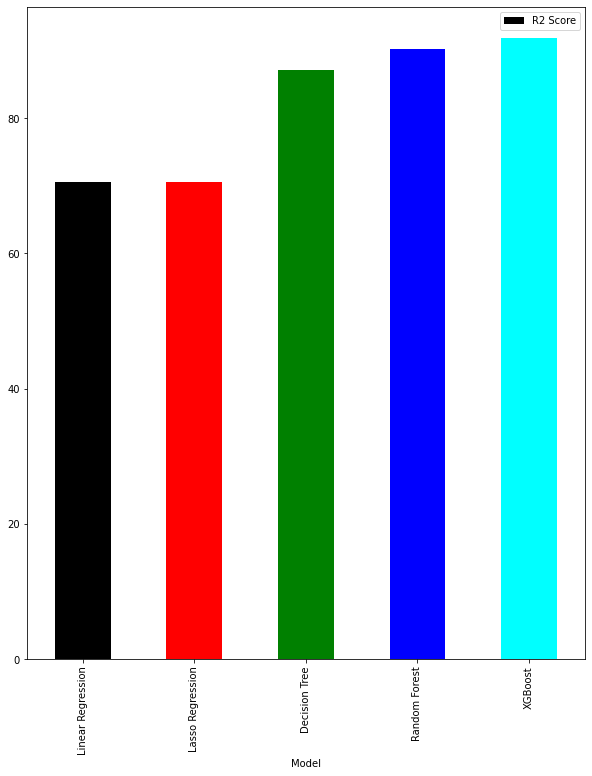

In [ ]:
result_df = result_df.sort_values("R2 Score")
result_df.plot(x = "Model", y = "R2 Score" , kind="bar",figsize=(10,12) , color=['black', 'red', 'green', 'blue', 'cyan'])

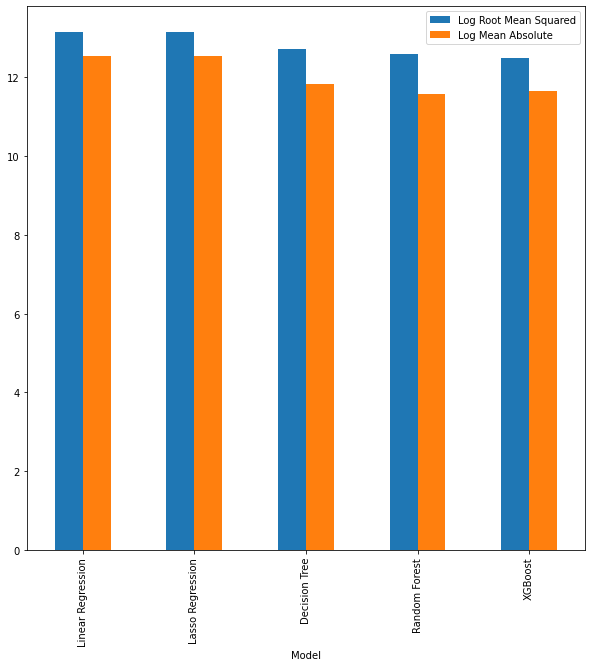

In [ ]:
result_df = result_df.sort_values("R2 Score")
result_df.plot(x = "Model", y=["Log Root Mean Squared", 'Log Mean Absolute'], kind="bar",figsize=(10,10))

In [ ]:
xg_boost_model = XGBRegressor(objective ='reg:squarederror',colsample_bytree = xg_boost_best_params['colsample_bytree'], eta = xg_boost_best_params['eta'], max_depth = xg_boost_best_params['max_depth'], n_estimators = xg_boost_best_params['n_estimators'])

#train model
xg_boost_model.fit(X_train,y_train)
#print score
xg_boost_model.score(X_test,y_test)

0.9215387063161675

**Saving Model and Scaler**

In [ ]:
# Saving model and scaler
joblib.dump(xg_boost_model,'xg_boost_model.pkl')

# Saving the scaler
scaler_filename = "min_max_scaler.save"
joblib.dump(scaler, scaler_filename) 

['min_max_scaler.save']

In [ ]:
X_train.head()
X_train.columns

Index(['Automatic', 'CNG and OIL', 'HYBRID', 'LPG and OIL', 'OIL', 'brand',
       'car_model', 'model_year', 'body_type', 'engine_capacity',
       'kilometers_run'],
      dtype='object')

In [ ]:
def get_price(transmission ,fuel_type, brand, car_model, model_year  ,body_type , engine_capacity, kilometers_run):
    brand_dict = {'Chevrolet': 0, 'Ford': 1, 'Haval': 2, 'Honda': 3, 'Hyundai': 4, 'Kia': 5, 'Mahindra': 6, 'Maruti Suzuki': 7, 'Mazda': 8, 'Mitsubishi': 9, 'Nissan': 10, 'Proton': 11, 'SsangYong': 12, 'Suzuki': 13, 'Tata': 14, 'Toyota': 15}
    body_type_dict = {'Estate': 0, 'Hatchback': 1, 'MPV': 2, 'SUV / 4x4': 3, 'Saloon': 4}
    car_model_dict = {'320i': 0, '5 Series': 1, 'APV': 2, 'Accent': 3, 'Allion': 4, 'Alphard': 5, 'Alto': 6, 'Alto 800': 7, 'Aqua': 8, 'Attrage': 9, 'Auris': 10, 'Avanza': 11, 'Axela': 12, 'Axio': 13, 'Bluebird': 14, 'C-Class': 15, 'C-HR': 16, 'CR-V': 17, 'CR-Z': 18, 'CX-7': 19, 'Cami': 20, 'Camry': 21, 'Carina': 22, 'Carryboy': 23, 'Cefiro': 24, 'City': 25, 'CityRover': 26, 'Civic': 27, 'Coaster': 28, 'Corolla': 29, 'Corona': 30, 'Corsa': 31, 'Crown': 32, 'Discovery': 33, 'Dualis': 34, 'Dyna': 35, 'E 250': 36, 'Eco Sport': 37, 'Esquire': 38, 'Estima': 39, 'Fielder': 40, 'Fiesta': 41, 'Fit': 42, 'GLA-Class': 43, 'GLX': 44, 'Grace': 45, 'H-RV': 46, 'H1': 47, 'H2': 48, 'HR-V': 49, 'Harrier': 50, 'Hiace': 51, 'Hilux': 52, 'Ikon': 53, 'Indigo Ecs': 54, 'Insight': 55, 'Juke': 56, 'Kluger': 57, 'Kyron': 58, 'Lancer': 59, 'Land Cruiser': 60, 'LiteAce': 61, 'MPV': 62, 'MR2': 63, 'Mark II': 64, 'Murano': 65, 'NX': 66, 'Noah': 67, 'Note': 68, 'Other Model': 69, 'Outlandar': 70, 'Outlander': 71, 'Pajero': 72, 'Passo': 73, 'Pathfinder': 74, 'Prado': 75, 'Premio': 76, 'Prius': 77, 'Probox': 78, 'Q5': 79, 'RAV4': 80, 'RVR': 81, 'RX': 82, 'RX-8': 83, 'Ractis': 84, 'Raum': 85, 'RunX': 86, 'Rush': 87, 'S660': 88, 'Santa Fe': 89, 'Satria': 90, 'Sienta': 91, 'Sonata': 92, 'Spacio': 93, 'Spark': 94, 'Sportage': 95, 'Sprinter': 96, 'Starlet': 97, 'Starlet Soleil': 98, 'Succeed': 99, 'Sunny': 100, 'Swift': 101, 'Terrano': 102, 'Tiida': 103, 'TownAce': 104, 'Tucson': 105, 'Urvan': 106, 'V6': 107, 'Vezel': 108, 'Vista': 109, 'Vitz': 110, 'WagonR': 111, 'Wish': 112, 'X Assista': 113, 'X-Trail': 114, 'XJ': 115, 'Yaris': 116, 'ist': 117, 'l200': 118, 'l300': 119}
    features = ['Automatic', 'CNG and OIL', 'HYBRID', 'LPG and OIL', 'OIL', 'brand', 'car_model', 'model_year', 'body_type', 'engine_capacity', 'kilometers_run']
    scale_vars = ['Automatic', 'CNG and OIL', 'HYBRID', 'LPG and OIL', 'OIL','body_type','engine_capacity',
                'kilometers_run']

    # deciding fuel type
    cng_and_oil = 0
    hybrid = 0
    lpg_and_oil = 0
    oil = 0
    if fuel_type == 'CNG and OIL':
        cng_and_oil = 1
    elif fuel_type == 'HYBRID':
        hybrid = 1
    elif fuel_type == 'LPG and OIL':
        lpg_and_oil = 1
    elif fuel_type == 'OIL':
        oil = 1


    # deciding transmission type
    if transmission == '1':
        automatic = 1
    else:
        automatic = 0


    test_array = [ automatic , cng_and_oil , hybrid, lpg_and_oil, oil, brand_dict[brand], car_model_dict[car_model], model_year, body_type_dict[body_type], engine_capacity, kilometers_run]
    test_array = np.array(test_array) # convert into numpy array
    
    test_array = test_array.reshape(1,-1) #reshape
    test_df = pd.DataFrame(test_array, columns = features)
 
    # scaling data
    scaler_filename = "min_max_scaler.save"
    scaler = joblib.load(scaler_filename)
    scaler.clip = False
    test_df[scale_vars] = scaler.transform(test_df[scale_vars])
    
    
    #declare path where you saved your model
    model_path = 'xg_boost_model.pkl'
    #open file
    file = open(model_path, "rb")
    #load the trained model
    trained_model = joblib.load(file)


    prediction = int(trained_model.predict(test_df))
    return prediction
   

In [ ]:
price = get_price('1','OIL', 'Toyota','Allion', 2009 ,'Saloon',1500 , 60000)
print(price)

1387724
